In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def gaus_kernel(x_n, x_m, theta):
        return theta[0] * np.exp(-(theta[1]/2)*(x_n-x_m)**2)+theta[2]+theta[3]*np.dot(x_n,  x_m)

In [3]:
n=100
theta = np.array([1, 2, 0, 0], dtype=np.float)
x = np.linspace(start=0, stop=10, num=n)
color = ['r', 'g', 'b']

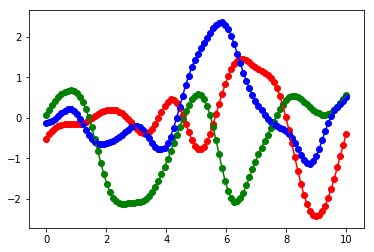

In [4]:
# gaussian process
for c in color:
    cov = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cov[i,j] = gaus_kernel(x[i], x[j], theta)
    z = np.zeros(n)
    ys = np.random.multivariate_normal(z, cov)  
    plt.plot(x, ys, color=c)
    plt.scatter(x, ys, color=c)

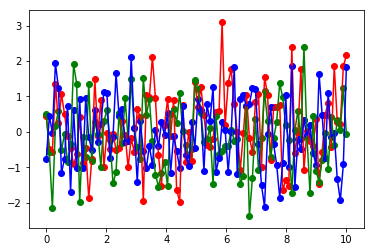

In [5]:
# independent version of gaussian process
for c in color:
    cov = np.eye(n)
    z = np.zeros(n)
    ys = np.random.multivariate_normal(z, cov)  
    plt.plot(x, ys, color=c)
    plt.scatter(x, ys, color=c)

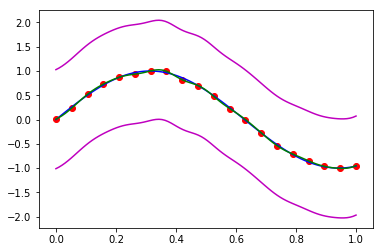

In [89]:
# regression by gaussian process
def target_fn(x):
    return np.sin(5* x)

# true data
x_true = np.linspace(0, 1, 100)
y_true = target_fn(x)

# target data
sample_num = 20
x_samples = np.linspace(0, 1, sample_num)
# x_samples = np.random.uniform(size=sample_num)
# x_samples[0]=0; x_samples[-1]=1
t = target_fn(x_samples) + np.random.normal(0.0, 1/beta, size=len(x_samples))

# hyper parameter
beta = 50.0
# smaller theta_1 for larger sample_num is better
theta = np.array([1, 200, 0, 0], dtype=np.float)

# compute covariance
cov = np.zeros((sample_num, sample_num))
for i, x_i in enumerate(x_samples):
    for j, x_j in enumerate(x_samples):       
        cov[i,j] = gaus_kernel(x_i, x_j, theta)
inv_cov = np.linalg.inv(cov)

# predicts data
x_preds = np.linspace(0, 1, 100)
mu = np.zeros_like(x_preds)
var = np.zeros_like(x_preds)
for i, x_pred in enumerate(x_preds):
    k = np.array([gaus_kernel(x_pred, x_sample, theta) for x_sample in x_samples])
    mu[i] = np.dot(np.dot(k, inv_cov),t)
    var[i] = gaus_kernel(x_pred, x_pred, theta) + 1/beta

# make plots
xs = [x_true, x_preds, x_preds, x_preds]
ys = [y_true, mu, mu+var, mu-var]
cs = ['b', 'g', 'm', 'm']
for x, y, c in zip(xs, ys, cs):
    plt.plot(x, y, color=c)
plt.scatter(x_samples, t, color='r')